In [141]:
from scipy.signal import medfilt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [142]:
xyz_coordinates = pd.read_csv("NaturalFrequency/tyk4.csv")
xyz_coordinates = xyz_coordinates[5:]
xyz_coordinates = xyz_coordinates.reset_index(drop=True)
xyz_coordinates = xyz_coordinates[['1.1', 'Take Name', "Take 2025-06-27 05.42.56 PM", "Capture Frame Rate"]]
xyz_coordinates.columns = ["time", 'X', 'Z', 'Y']
xyz_coordinates['X'] = xyz_coordinates['X'].astype(float)
xyz_coordinates['Y'] = xyz_coordinates['Y'].astype(float)
xyz_coordinates['Z'] = xyz_coordinates['Z'].astype(float)
xyz_coordinates['time'] = xyz_coordinates['time'].astype(float)
xyz_coordinates.head()

,time,X,Z,Y
0,0.000000,-0.585704,1.294526,0.749076
1,0.019608,-0.585718,1.294527,0.749080
2,0.039216,-0.585706,1.294551,0.749081
3,0.058824,-0.585683,1.294553,0.749077
4,0.078431,-0.585662,1.294539,0.749076


In [26]:
xyz_coordinates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    533 non-null    float64
 1   X       533 non-null    float64
 2   Z       533 non-null    float64
 3   Y       533 non-null    float64
dtypes: float64(4)
memory usage: 16.8 KB


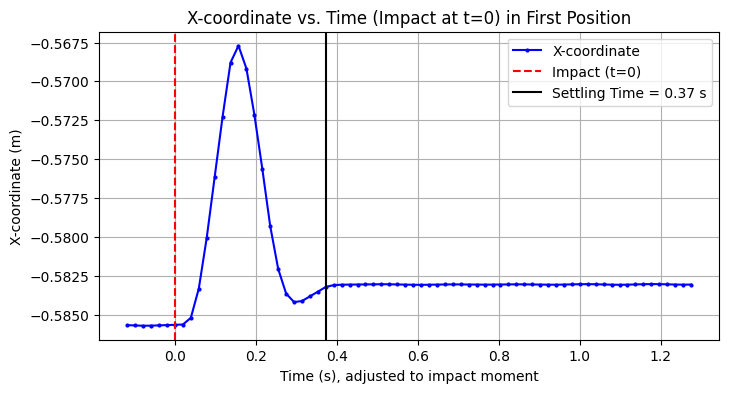

In [143]:
time = np.array(xyz_coordinates['time'])  # Original time in ms
time = time[time > 4.5]
len1 = len(time)
time = time[time < 6]
len2 = len(time)

X = np.array(xyz_coordinates["X"])  # X-coordinate
X = X[::-1][:len1][::-1]
X = X[:len2]

window_size = 5  # Must be odd (3, 5, 7, ...)
smoothed_X = medfilt(X, kernel_size=window_size)

window_size_2 = 7
smoothed_X = np.convolve(smoothed_X, np.ones(window_size)/window_size, mode='valid')

dX = np.abs(np.diff(smoothed_X))  # Absolute difference between consecutive X values
threshold = 0.0005  # Adjust based on your data noise level
impact_index = np.where(dX > threshold)[0][0]  # First index where change exceeds threshold
impact_time = time[impact_index]  # Time at impact moment

# Step 2: Shift time to start from impact moment (t = 0)
adjusted_time = time - impact_time

smoothed_time = adjusted_time[window_size//2 : -(window_size//2) or None]

t_impact = 0.0  # Known impact time (adjust to your data)

# --- STEP 1: Isolate post-impact data ---
post_impact_mask = smoothed_time >= t_impact
time_post = smoothed_time[post_impact_mask]
X_post = smoothed_X[post_impact_mask]

# --- STEP 2: Steady-state value (last 10% of post-impact data) ---
steady_state = np.mean(X_post[-int(0.1 * len(X_post)):])

# --- STEP 3: Tolerance band (2% of total range) ---
tolerance = 0.02 * (np.max(X_post) - np.min(X_post))

# --- STEP 4: Find settling time ---
# Index where signal LAST exits tolerance band
outside_band = np.where(np.abs(X_post - steady_state) > tolerance)[0]
settling_index = outside_band[-1] + 1 if len(outside_band) > 0 else 0
settling_time = time_post[settling_index] - t_impact  # Time since impact

# Step 3: Plot
plt.figure(figsize=(8, 4))
plt.plot(smoothed_time, smoothed_X, marker='o', linestyle='-', color='b', markersize=2, label='X-coordinate')
plt.axvline(x=0, color='r', linestyle='--', label='Impact (t=0)')  # Mark impact moment
plt.axvline(time_post[settling_index], color='k', linestyle='-', 
            label=f'Settling Time = {settling_time:.2f} s')
# Labels and title
plt.xlabel('Time (s), adjusted to impact moment')
plt.ylabel('X-coordinate (m)')
plt.title('X-coordinate vs. Time (Impact at t=0) in First Position')
# plt.xticks(np.arange(-0.5, 2, 0.25))  # Adjust x-ticks as needed
plt.legend()
plt.grid(True)
plt.show()

The same for TALL

In [144]:
xyz_coordinates = pd.read_csv("NaturalFrequency/tyk3_tall.csv")
xyz_coordinates = xyz_coordinates[5:]
xyz_coordinates = xyz_coordinates.reset_index(drop=True)
xyz_coordinates = xyz_coordinates[['1.1', 'Take Name', "Take 2025-06-30 05.20.42 PM", "Capture Frame Rate"]]
xyz_coordinates.columns = ["time", 'X', 'Z', 'Y']
xyz_coordinates['X'] = xyz_coordinates['X'].astype(float)
xyz_coordinates['Y'] = xyz_coordinates['Y'].astype(float)
xyz_coordinates['Z'] = xyz_coordinates['Z'].astype(float)
xyz_coordinates['time'] = xyz_coordinates['time'].astype(float)
xyz_coordinates.head()

,time,X,Z,Y
0,5.833333,-0.723462,1.413826,0.559350
1,5.841667,-0.723474,1.413908,0.559375
2,5.850000,-0.723446,1.413980,0.559379
3,5.858333,-0.723411,1.414018,0.559387
4,5.866667,-0.723374,1.414005,0.559384


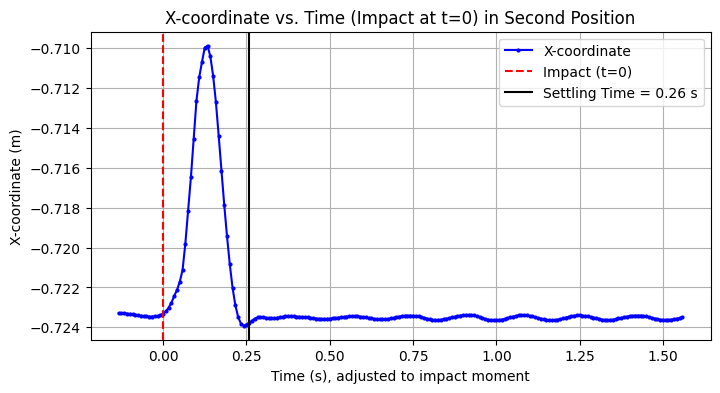

In [145]:
time = np.array(xyz_coordinates['time'])  # Original time in ms
# print(time)
time = time[time > 6.6]
X = np.array(xyz_coordinates["X"])  # X-coordinate
X = X[::-1][:len(time)][::-1]  # Ensure X and time arrays are the same length

window_size = 5  # Must be odd (3, 5, 7, ...)
smoothed_X = medfilt(X, kernel_size=window_size)

window_size_2 = 7
smoothed_X = np.convolve(smoothed_X, np.ones(window_size)/window_size, mode='valid')

# print(smoothed_X)

dX = np.abs(np.diff(smoothed_X))  # Absolute difference between consecutive X values
# print(dX)
threshold = 0.0002  # Adjust based on your data noise level
impact_index = np.where(dX > threshold)[0][0]  # First index where change exceeds threshold
impact_time = time[impact_index]  # Time at impact moment

# Step 2: Shift time to start from impact moment (t = 0)
adjusted_time = time - impact_time

smoothed_time = adjusted_time[window_size//2 : -(window_size//2) or None]

t_impact = 0.0  # Known impact time (adjust to your data)

# --- STEP 1: Isolate post-impact data ---
post_impact_mask = smoothed_time >= t_impact
time_post = smoothed_time[post_impact_mask]
X_post = smoothed_X[post_impact_mask]

# --- STEP 2: Steady-state value (last 10% of post-impact data) ---
steady_state = np.mean(X_post[-int(0.1 * len(X_post)):])

# --- STEP 3: Tolerance band (2% of total range) ---
tolerance = 0.02 * (np.max(X_post) - np.min(X_post))

# --- STEP 4: Find settling time ---
# Index where signal LAST exits tolerance band
outside_band = np.where(np.abs(X_post - steady_state) > tolerance)[0]
settling_index = outside_band[-1] + 1 if len(outside_band) > 0 else 0
settling_time = time_post[settling_index] - t_impact  # Time since impact



# Step 3: Plot
plt.figure(figsize=(8, 4))
plt.plot(smoothed_time, smoothed_X, marker='o', linestyle='-', color='b', markersize=2, label='X-coordinate')
plt.axvline(x=0, color='r', linestyle='--', label='Impact (t=0)')  # Mark impact moment
plt.axvline(time_post[settling_index], color='k', linestyle='-', 
            label=f'Settling Time = {settling_time:.2f} s')
# Labels and title
plt.xlabel('Time (s), adjusted to impact moment')
plt.ylabel('X-coordinate (m)')
plt.title('X-coordinate vs. Time (Impact at t=0) in Second Position')
# plt.xticks(np.arange(-0.125, 1.75, 0.125))  # Adjust x-ticks for better visibility
plt.legend()
plt.grid(True)
plt.show()